<a href="https://colab.research.google.com/github/lesharicotsverts/ds4bme_intro/blob/master/project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Country/Region       Date  Count
207      Australia 2020-03-13      1
211      Australia 2020-03-14      1
215      Australia 2020-03-15      1
219      Australia 2020-03-16      2
223      Australia 2020-03-17      2
..             ...        ...    ...
927      Australia 2020-09-09    113
931      Australia 2020-09-10    113
935      Australia 2020-09-11    113
939      Australia 2020-09-12    113
943      Australia 2020-09-13    113

[185 rows x 3 columns]
    Country/Region       Date   Count
165      Argentina 2020-03-03       1
169      Argentina 2020-03-04       1
173      Argentina 2020-03-05       1
177      Argentina 2020-03-06       2
181      Argentina 2020-03-07       8
..             ...        ...     ...
925      Argentina 2020-09-09  512293
929      Argentina 2020-09-10  524198
933      Argentina 2020-09-11  535705
937      Argentina 2020-09-12  546481
941      Argentina 2020-09-13  555537

[195 rows x 3 columns]
    Country/Region       Date  Count
158        Arme

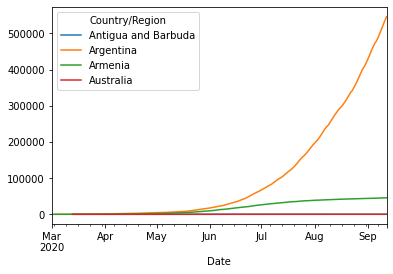

In [ ]:
# Question 1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Parse the CSV file to panda data format
df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData"
                 "/COVID-19/master/csse_covid_19_data"
                 "/csse_covid_19_time_series"
                 "/time_series_covid19_confirmed_global.csv", )
# get rid of unused columns
df = df.drop(['Lat', 'Long', 'Province/State'], axis=1)
# Only keep data for four countries
df = df.iloc[5:9]

# There are 200+ columns for dates in the csv file. they need to be
# flipped in a way that we have one column for dates and one column
# for patient count for each date. print(df_melted) to compare it
# against df
# reference: https://pandas.pydata.org/pandas-docs/stable/reference
# /api/pandas.DataFrame.melt.html?highlight=melt#pandas.DataFrame.melt
# see the examples in the above link
df_melted = pd.melt(df, id_vars=['Country/Region'], var_name='Date',
                    value_name='Count')


# Convert the Date column to Date type
df_melted['Date'] = pd.to_datetime(df_melted['Date'])
# Remove non zero counts
df_melted = df_melted[df_melted["Count"]>0]

# There are four locations that need to be visualized so I have to
# reshape the data format, again using the pivot method.
# Reference: https://pandas.pydata.org/pandas-docs/stable
# /getting_started/intro_tutorials/09_timeseries.html#datetime-as-index
df_pivot = df_melted.pivot(index="Date", columns="Country/Region",
                           values="Count")
#Country specific 
Aus = df_melted[df_melted["Country/Region"].str.match(
    "Australia")]
print(Aus)
Arg = df_melted[df_melted["Country/Region"].str.match(
    "Argentina")]
print(Arg)

Arm = df_melted[df_melted["Country/Region"].str.match(
    "Armenia")]
print(Arm)
Anb = df_melted[df_melted["Country/Region"].str.match(
    "Antigua and Barbuda")]
print(Anb)

#print(df_pivot)
df_pivot["1/22/2020":"9/12/2020"].plot()
plt.show()

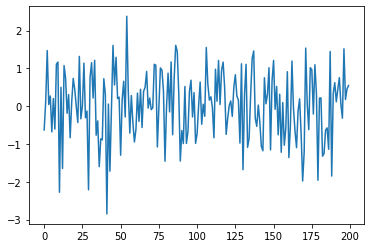

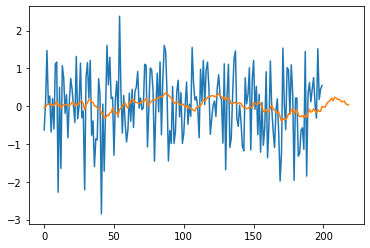

In [ ]:
#Question 2
## create a signal_Australia
x1=Aus['Count']
x1 = np.random.normal(size = 200)
plt.plot(x1)
plt.show()
## Create a kernel
k = np.zeros(20) + 1
k = k / k.size
y= np.convolve(x1, k)

plt.plot(x1)
plt.plot(y)
plt.show()


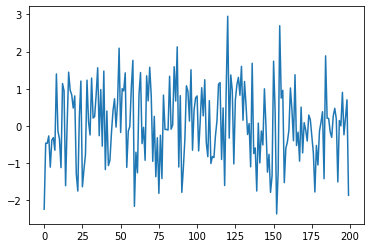

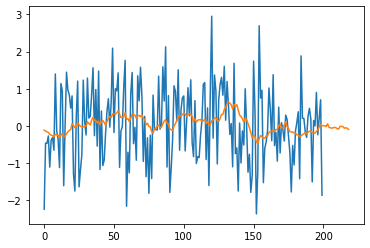

In [ ]:

## create a signal_Argentina
x2=Arg['Count']
x2 = np.random.normal(size =200)
plt.plot(x2)
plt.show()
## Create a kernel
k = np.zeros(20) + 1
k = k / k.size
y2 = np.convolve(x2, k)

plt.plot(x2)
plt.plot(y2)
plt.show()


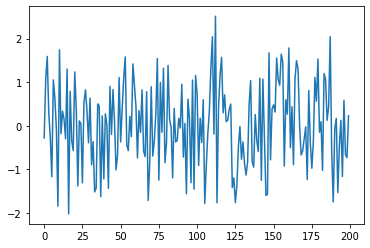

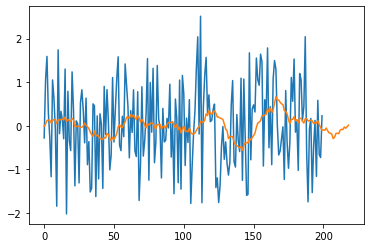

In [ ]:
x3 = Arm['Count']
x3 = np.random.normal(size = 200)
plt.plot(x3)
plt.show()
## Create a kernel
k = np.zeros(20) + 1
k = k / k.size
y3 = np.convolve(x3, k)

plt.plot(x3)
plt.plot(y3)
plt.show()

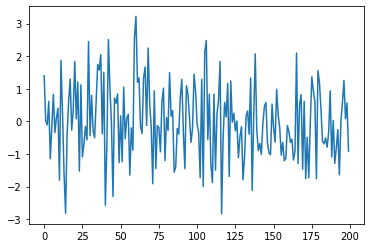

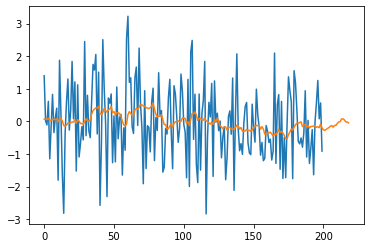

In [ ]:
x4= Anb['Count']
x4 = np.random.normal(size = 200)
plt.plot(x4)
plt.show()
## Create a kernel
k = np.zeros(20) + 1
k = k / k.size
y4 = np.convolve(x4, k)

plt.plot(x4)
plt.plot(y4)
plt.show()

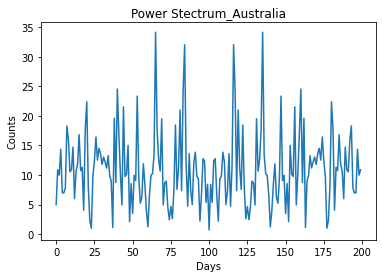

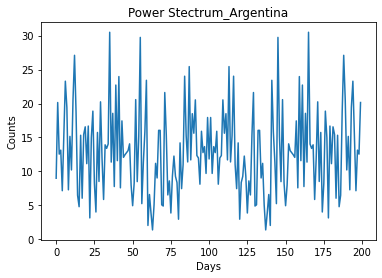

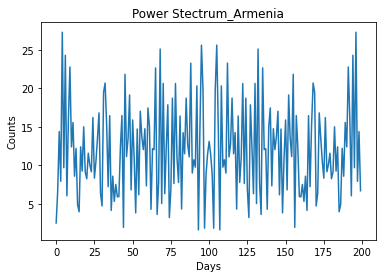

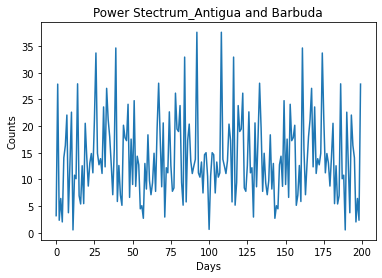

In [ ]:
#Question 3
#Add title and axis names
plt.title('Power Stectrum_Australia')
plt.xlabel('Days')
plt.ylabel('Counts')
#Power spectum Australia
a1 = np.fft.fft(x1)
b1 = np.sqrt(a1.real ** 2 + a1.imag ** 2)
plt.plot(b1)
plt.show()


#Add title and axis names
plt.title('Power Stectrum_Argentina')
plt.xlabel('Days')
plt.ylabel('Counts')
#Power spectum Argentina
a2 = np.fft.fft(x2)
b2 = np.sqrt(a2.real ** 2 + a2.imag ** 2)
plt.plot(b2)
plt.show()

#Add title and axis names
plt.title('Power Stectrum_Armenia')
plt.xlabel('Days')
plt.ylabel('Counts')
#Power spectum Argentina
a3 = np.fft.fft(x3)
b3 = np.sqrt(a3.real ** 2 + a3.imag ** 2)
plt.plot(b3)
plt.show()

#Add title and axis names
plt.title('Power Stectrum_Antigua and Barbuda')
plt.xlabel('Days')
plt.ylabel('Counts')
#Power spectum Argentina
a4 = np.fft.fft(x4)
b4 = np.sqrt(a4.real ** 2 + a4.imag ** 2)
plt.plot(b4)
plt.show()

In [ ]:
# Question 4
import pandas as pd

# Parse the CSV file to panda data format
dr = pd.read_csv(
    "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master"
    "/csse_covid_19_data/csse_covid_19_time_series"
    "/time_series_covid19_deaths_global.csv", )

# get rid of unused columns
dr = dr.drop(['Lat', 'Long', 'Province/State'], axis=1)

# There are 200+ columns for dates in the csv file. they need to be
# flipped in a way that we have one column for dates and one column
# for patient count for each date. print(df_melted) to compare it
# against df
# reference: https://pandas.pydata.org/pandas-docs/stable/reference
# /api/pandas.DataFrame.melt.html?highlight=melt#pandas.DataFrame.melt
# see the examples in the above link
dr_melted = pd.melt(dr, id_vars=['Country/Region'], var_name='Date',
                    value_name='Count')
totalDeaths= dr_melted["Count"].sum()

# Parse the CSV file to panda data format
df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData"
                 "/COVID-19/master/csse_covid_19_data"
                 "/csse_covid_19_time_series"
                 "/time_series_covid19_confirmed_global.csv", )
# get rid of unused columns
df = df.drop(['Lat', 'Long', 'Province/State'], axis=1)


df_melted = pd.melt(df, id_vars=['Country/Region'], var_name='Date',
                    value_name='Count')

totalCases= df_melted["Count"].sum()

caseFatalityRate= totalDeaths / totalCases

print(f" Number of total Deaths is: {totalDeaths}.\n Number of total "
      f"Cases is: {totalCases}.\n The overall case fatality rate is: "
      f"{caseFatalityRate}")

 Number of total Deaths is: 81421006.
 Number of total Cases is: 1924213757.
 The overall case fatality rate is: 0.042313909098613725


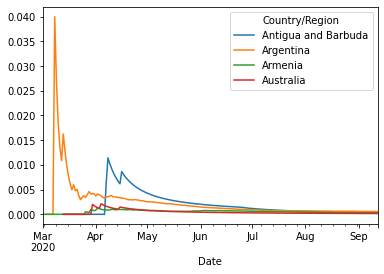

In [ ]:
# Question 5
import pandas as pd
import matplotlib.pyplot as plt

# Parse the CSV file to panda data format
dr = pd.read_csv(
    "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master"
    "/csse_covid_19_data/csse_covid_19_time_series"
    "/time_series_covid19_deaths_global.csv", )

# get rid of unused columns
dr = dr.drop(['Lat', 'Long', 'Province/State'], axis=1)
dr = dr.iloc[5:9]

# There are 200+ columns for dates in the csv file. they need to be
# flipped in a way that we have one column for dates and one column
# for patient count for each date. print(df_melted) to compare it
# against df
# reference: https://pandas.pydata.org/pandas-docs/stable/reference
# /api/pandas.DataFrame.melt.html?highlight=melt#pandas.DataFrame.melt
# see the examples in the above link
dr_melted = pd.melt(dr, id_vars=['Country/Region'], var_name='Date',
                    value_name='Death Count')
dr_melted['Date'] = pd.to_datetime(dr_melted['Date'])
dr_melted.sort_values(by=['Date'])
#print(dr_melted)

# Parse the CSV file to panda data format
df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData"
                 "/COVID-19/master/csse_covid_19_data"
                 "/csse_covid_19_time_series"
                 "/time_series_covid19_confirmed_global.csv", )
# get rid of unused columns
df = df.drop(['Lat', 'Long', 'Province/State'], axis=1)
# Only keep data for four countries
df = df.iloc[5:9]

# There are 200+ columns for dates in the csv file. they need to be
# flipped in a way that we have one column for dates and one column
# for patient count for each date. print(df_melted) to compare it
# against df
# reference: https://pandas.pydata.org/pandas-docs/stable/reference
# /api/pandas.DataFrame.melt.html?highlight=melt#pandas.DataFrame.melt
# see the examples in the above link
df_melted = pd.melt(df, id_vars=['Country/Region'], var_name='Date',
                    value_name='Case Count')
# Convert the Date column to Date type
df_melted['Date'] = pd.to_datetime(df_melted['Date'])
df_melted = df_melted.sort_values(by=['Date'])

df_melted["Cumulative Cases"] = df_melted.groupby(
    "Country/Region").cumsum()
#print(df_melted)

# Join two tables together
# https://pandas.pydata.org/docs/user_guide/merging.html#database
# -style-dataframe-or-named-series-joining-merging
joinedDF = pd.merge(dr_melted, df_melted, how='left',
                    on=['Country/Region', 'Date'])
# joinedDF.to_excel('JoinedDF.xlsx', sheet_name='df_melted',
#                    index=False)
joinedDF = joinedDF[joinedDF["Cumulative Cases"] > 0]
joinedDF['d'] = joinedDF['Death Count'] / joinedDF['Cumulative Cases']
# print(joinedDF)
joinedDF = joinedDF.pivot(index="Date", columns="Country/Region",
                          values="d")

#print(joinedDF)
joinedDF["1/22/2020":"9/12/2020"].plot()
plt.show()